In [113]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [114]:
main_dish = pd.read_csv('main_dish.csv')
side_dish = pd.read_csv('side_dish.csv')
kimchi = pd.read_csv('removed_kimchi.csv')
rice = pd.read_csv('removed_rice.csv')
soup = pd.read_csv('removed_soup.csv')

In [115]:
main_dish.head()
# side_dish.head()
# kimchi.head()
# rice.head()
# soup.head()

,RecipeID,Name,식품대분류,식품상세분류,1회제공량(g),calories,carbohydrate,protein,fat,sugar,sodium
0,1,오징어순대,찜류,어패류찜,350,466.86,58.3,45.7,5.6,0.4,1258.71
1,2,대구찜,찜류,어패류찜,500,376.42,24.7,51.7,7.9,5.7,1898.67
2,3,동태찜,찜류,어패류찜,500,394.32,25.8,50.9,9.7,5.7,1985.60
3,4,돼지등갈비찜,찜류,육류찜,450,961.04,57.4,72.1,49.2,24.1,2395.17
4,5,돼지머리고기,찜류,육류찜,200,650.00,3.5,42.4,52.0,0.1,333.64


In [116]:
main_dish.info()
# side_dish.info()
# kimchi.info()
# rice.info()
# soup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RecipeID      202 non-null    int64  
 1   Name          202 non-null    object 
 2   식품대분류         202 non-null    object 
 3   식품상세분류        202 non-null    object 
 4   1회제공량(g)      202 non-null    int64  
 5   calories      202 non-null    float64
 6   carbohydrate  202 non-null    float64
 7   protein       202 non-null    float64
 8   fat           202 non-null    float64
 9   sugar         202 non-null    float64
 10  sodium        202 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 17.5+ KB


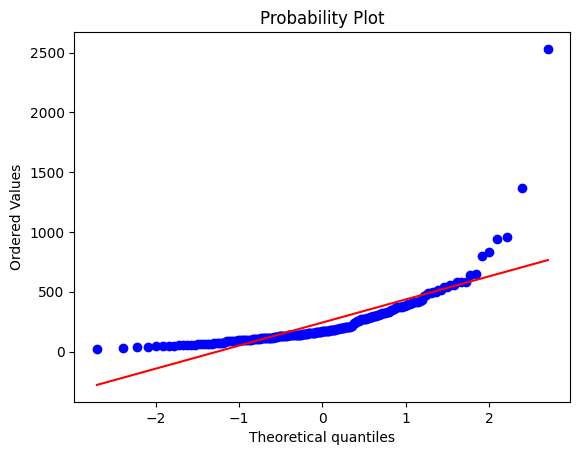

In [117]:
import pylab 
import scipy.stats as stats
stats.probplot(main_dish.calories.to_numpy(), dist="norm", plot=pylab)
pylab.show()

In [118]:
main_dish_dataset=main_dish.copy()
side_dish_dataset=side_dish.copy()
kimchi_dataset=kimchi.copy()
rice_dataset=rice.copy()
soup_dataset=soup.copy()
columns=['RecipeID','Name','calories','carbohydrate','protein','fat','sugar','sodium']
main_dish_dataset=main_dish_dataset[columns]
side_dish_dataset=side_dish_dataset[columns]
kimchi_dataset=kimchi_dataset[columns]
rice_dataset=rice_dataset[columns]
soup_dataset=soup_dataset[columns]

In [119]:
random_meal = []
for i in range(0, 100):
    list = []
    main_random_num = random.randint(1, len(main_dish_dataset.index))
    side_random_num = random.randint(1, len(side_dish_dataset.index))
    rice_random_num = random.randint(1, len(rice_dataset.index))
    kimchi_random_num = random.randint(1, len(kimchi_dataset.index))
    soup_random_num = random.randint(1, len(soup_dataset.index))
    list = [main_random_num, side_random_num, rice_random_num, kimchi_random_num, soup_random_num]
    random_meal.append(list)
print(random_meal)
print(len(random_meal))



[[161, 41, 38, 25, 72], [125, 107, 1, 13, 2], [68, 40, 3, 5, 121], [92, 100, 40, 23, 116], [94, 98, 30, 19, 17], [15, 28, 34, 20, 18], [55, 45, 39, 1, 7], [55, 148, 4, 1, 13], [104, 116, 35, 21, 61], [56, 118, 18, 20, 110], [195, 40, 47, 19, 50], [71, 74, 47, 22, 36], [99, 144, 12, 15, 84], [90, 5, 7, 17, 127], [41, 92, 7, 17, 119], [132, 71, 19, 12, 130], [127, 83, 37, 10, 107], [159, 55, 29, 18, 16], [91, 63, 24, 18, 76], [191, 113, 28, 10, 55], [54, 100, 10, 1, 56], [73, 140, 5, 2, 86], [126, 109, 21, 14, 11], [21, 119, 32, 1, 162], [190, 13, 36, 7, 47], [20, 129, 15, 11, 169], [168, 79, 33, 25, 157], [165, 49, 54, 8, 152], [38, 102, 19, 22, 14], [79, 43, 9, 14, 18], [80, 150, 21, 13, 60], [188, 74, 1, 20, 155], [129, 151, 39, 18, 135], [64, 138, 22, 20, 18], [53, 66, 3, 7, 155], [5, 103, 24, 12, 54], [58, 124, 18, 17, 63], [157, 119, 8, 10, 181], [138, 52, 9, 5, 143], [182, 99, 39, 24, 122], [25, 5, 15, 20, 174], [28, 5, 4, 7, 25], [46, 61, 31, 4, 18], [89, 20, 37, 24, 121], [87, 4

In [120]:
random_meal_cal = [];random_meal_car = []
random_meal_pro= [];random_meal_fat = []
random_meal_sug = [];random_meal_sod = []
data_set_list = [main_dish_dataset, side_dish_dataset, rice_dataset, kimchi_dataset, soup_dataset]
for i in range(len(random_meal)):
        meal_cal, meal_car, meal_pro, meal_fat, meal_sug, meal_sod = 0, 0, 0, 0, 0, 0
        for j in range(5):
                recipe_id = random_meal[i][j]
                row = data_set_list[j][data_set_list[j]['RecipeID'] == recipe_id]
                if not row.empty:
                        row = row.iloc[0]
                        cal = row['calories'];car = row['carbohydrate']
                        pro = row['protein'];fat = row['fat']
                        sug = row['sugar'];sod = row['sodium']   

                        meal_cal += cal;meal_car += car
                        meal_pro += pro;meal_fat += fat
                        meal_sug += sug;meal_sod += sod

        random_meal_cal.append(meal_cal);random_meal_car.append(meal_car)
        random_meal_pro.append(meal_pro);random_meal_fat.append(meal_fat)
        random_meal_sug.append(meal_sug);random_meal_sod.append(meal_sod)

print(recipe_id)
print(row)
print(random_meal_cal)
print(len(random_meal_cal))


181
RecipeID               181
Name            돼지고기 고추장찌개
calories              70.0
carbohydrate           7.0
protein                6.0
fat                    2.2
sugar                  2.0
sodium               646.0
Name: 180, dtype: object
[948.0100000000001, 852.26, 778.0799999999999, 937.89, 1431.6699999999996, 712.91, 976.99, 1769.9599999999998, 1040.3, 1229.68, 863.56, 935.62, 1722.95, 985.7399999999999, 991.3599999999999, 1310.25, 1511.92, 1095.72, 1790.8, 932.15, 1211.8, 1268.14, 911.1200000000001, 1193.06, 1106.0, 1314.75, 656.88, 682.77, 855.67, 1036.6, 928.0800000000002, 210.47, 1056.75, 1023.9300000000001, 1198.06, 1671.98, 1001.21, 1090.8200000000002, 979.5899999999999, 935.0399999999998, 1056.48, 2079.87, 1175.4499999999998, 953.54, 1349.76, 1010.3199999999998, 770.6099999999999, 1697.35, 1115.47, 1025.94, 799.5200000000001, 895.91, 692.72, 1826.5700000000002, 1246.1799999999998, 1064.04, 1361.6900000000003, 818.4300000000001, 1004.36, 1391.15, 1124.9700000000003, 952.

In [121]:
print(random_meal)

[[161, 41, 38, 25, 72], [125, 107, 1, 13, 2], [68, 40, 3, 5, 121], [92, 100, 40, 23, 116], [94, 98, 30, 19, 17], [15, 28, 34, 20, 18], [55, 45, 39, 1, 7], [55, 148, 4, 1, 13], [104, 116, 35, 21, 61], [56, 118, 18, 20, 110], [195, 40, 47, 19, 50], [71, 74, 47, 22, 36], [99, 144, 12, 15, 84], [90, 5, 7, 17, 127], [41, 92, 7, 17, 119], [132, 71, 19, 12, 130], [127, 83, 37, 10, 107], [159, 55, 29, 18, 16], [91, 63, 24, 18, 76], [191, 113, 28, 10, 55], [54, 100, 10, 1, 56], [73, 140, 5, 2, 86], [126, 109, 21, 14, 11], [21, 119, 32, 1, 162], [190, 13, 36, 7, 47], [20, 129, 15, 11, 169], [168, 79, 33, 25, 157], [165, 49, 54, 8, 152], [38, 102, 19, 22, 14], [79, 43, 9, 14, 18], [80, 150, 21, 13, 60], [188, 74, 1, 20, 155], [129, 151, 39, 18, 135], [64, 138, 22, 20, 18], [53, 66, 3, 7, 155], [5, 103, 24, 12, 54], [58, 124, 18, 17, 63], [157, 119, 8, 10, 181], [138, 52, 9, 5, 143], [182, 99, 39, 24, 122], [25, 5, 15, 20, 174], [28, 5, 4, 7, 25], [46, 61, 31, 4, 18], [89, 20, 37, 24, 121], [87, 4

In [122]:
max_daily_Calories=2700
max_daily_Carbohydrate=325
max_daily_Protein=200
max_daily_fat=100
max_daily_Sugar=40
max_daily_Sodium=3000
max_list=[max_daily_Calories, max_daily_Carbohydrate, max_daily_Protein, max_daily_fat, max_daily_Sugar, max_daily_Sodium]

max_one_meal_Calories=1500
max_one_meal_Carbohydrate=200
max_one_meal_Protein=150
max_one_meal_fat=60
max_one_meal_Sugar=30
max_one_meal_Sodium=2000
max_one_meal_list=[max_one_meal_Calories, max_one_meal_Carbohydrate, max_one_meal_Protein, max_one_meal_fat, max_one_meal_Sugar, max_one_meal_Sodium]

In [123]:
filtered_random_meal = random_meal.copy()
random_meal_nut = [random_meal_cal, random_meal_car, random_meal_pro, random_meal_fat, random_meal_sug, random_meal_sod]
for i in range(len(random_meal)):
    for j in range(6): 
        if random_meal_nut[j][i] > max_one_meal_list[j]:
            filtered_random_meal[i] = 0
print(filtered_random_meal)
filtered_random_meal = [i for i in filtered_random_meal if i != 0]
print(filtered_random_meal)
print(len(filtered_random_meal))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [168, 79, 33, 25, 157], 0, [38, 102, 19, 22, 14], 0, 0, [188, 74, 1, 20, 155], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [169, 12, 19, 6, 33], 0, 0, 0, 0, [75, 59, 29, 3, 58], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[168, 79, 33, 25, 157], [38, 102, 19, 22, 14], [188, 74, 1, 20, 155], [169, 12, 19, 6, 33], [75, 59, 29, 3, 58]]
5


In [124]:
filtered_meal_cal = [];filtered_meal_car = []
filtered_meal_pro= [];filtered_meal_fat = []
filtered_meal_sug = [];filtered_meal_sod = []
for i in range(len(filtered_random_meal)):
        meal_cal, meal_car, meal_pro, meal_fat, meal_sug, meal_sod = 0, 0, 0, 0, 0, 0
        for j in range(5):
                recipe_id = random_meal[i][j]
                row = data_set_list[j][data_set_list[j]['RecipeID'] == recipe_id]
                if not row.empty:
                        row = row.iloc[0]
                        cal = row['calories'];car = row['carbohydrate']
                        pro = row['protein'];fat = row['fat']
                        sug = row['sugar'];sod = row['sodium']   

                        meal_cal += cal;meal_car += car
                        meal_pro += pro;meal_fat += fat
                        meal_sug += sug;meal_sod += sod

        filtered_meal_cal.append(meal_cal);filtered_meal_car.append(meal_car)
        filtered_meal_pro.append(meal_pro);filtered_meal_fat.append(meal_fat)
        filtered_meal_sug.append(meal_sug);filtered_meal_sod.append(meal_sod)
filtered_meal_list = [filtered_meal_cal, filtered_meal_car, filtered_meal_pro, filtered_meal_fat, filtered_meal_sug, filtered_meal_sod]
print(filtered_meal_cal)
print(len(filtered_meal_cal))
print(len(filtered_meal_sod))

[948.0100000000001, 852.26, 778.0799999999999, 937.89, 1431.6699999999996]
5
5


In [146]:
final_meal = pd.DataFrame()
final_meal["MealID"] = filtered_random_meal
final_meal["calories"] = filtered_meal_cal
final_meal["carbohydrate"] = filtered_meal_car
final_meal["protein"] = filtered_meal_pro
final_meal["fat"] = filtered_meal_fat
final_meal["sugar"] = filtered_meal_sug
final_meal["sod"] = filtered_meal_sod

print(final_meal)
final_meal.to_csv("final_meal.csv")
final_meal_csv = pd.read_csv("final_meal.csv")

                   MealID  calories  carbohydrate  protein    fat  sugar  \
0  [168, 79, 33, 25, 157]    948.01        124.91    71.56  18.06  20.21   
1   [38, 102, 19, 22, 14]    852.26         61.58    81.10  31.25   7.87   
2   [188, 74, 1, 20, 155]    778.08        104.78    27.84  27.49  23.16   
3    [169, 12, 19, 6, 33]    937.89        104.09    69.54  27.04  23.57   
4     [75, 59, 29, 3, 58]   1431.67        149.75    88.02  53.44  25.48   

       sod  
0  3419.61  
1  4975.87  
2  2709.42  
3  3700.78  
4  5015.86  


In [126]:
final_meal.iloc[:,1:7].corr()

,calories,carbohydrate,protein,fat,sugar,sod
calories,1.000000,0.751564,0.636360,0.838561,0.444627,0.606161
carbohydrate,0.751564,1.000000,0.135881,0.426660,0.840945,-0.054997
protein,0.636360,0.135881,1.000000,0.437587,-0.255970,0.870427
fat,0.838561,0.426660,0.437587,1.000000,0.245901,0.681921
sugar,0.444627,0.840945,-0.255970,0.245901,1.000000,-0.404150
sod,0.606161,-0.054997,0.870427,0.681921,-0.404150,1.000000


In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

scaler = StandardScaler()
final_data = scaler.fit_transform(final_meal.iloc[:,1:7].to_numpy())

In [128]:
final_data

array([[-0.18111367,  0.54791021,  0.18823369, -1.13377186,  0.02403781,
        -0.60373811],
       [-0.59826064, -1.63607479,  0.64308409, -0.01743483, -1.92745305,
         1.12120574],
       [-0.92143517, -0.14628872, -1.89625893, -0.33566282,  0.49056116,
        -1.39090598],
       [-0.22520273, -0.17008391,  0.09192365, -0.37374862,  0.55539999,
        -0.29209194],
       [ 1.9260122 ,  1.4045372 ,  0.9730175 ,  1.86061813,  0.85745409,
         1.16553028]])

In [129]:
neigh = NearestNeighbors(metric="cosine", algorithm="brute")
neigh.fit(final_data)

NearestNeighbors(algorithm='brute', metric='cosine')

In [130]:
transformer = FunctionTransformer(neigh.kneighbors, kw_args={'return_distance':False})
pipeline = Pipeline([('std_scaler', scaler),('NN', transformer)])
params = {'n_neighbors':3, 'return_distance':False}
pipeline.get_params()
pipeline.set_params(NN__kw_args=params)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('NN',
                 FunctionTransformer(func=<bound method KNeighborsMixin.kneighbors of NearestNeighbors(algorithm='brute', metric='cosine')>,
                                     kw_args={'n_neighbors': 3,
                                              'return_distance': False}))])

In [155]:
final_meal_csv.iloc[1][1]

'[38, 102, 19, 22, 14]'

In [153]:
pipeline.transform(final_meal_csv.iloc[0:7].to_numpy())[0]


ValueError: could not convert string to float: '[168, 79, 33, 25, 157]'